## Notebook for ENCN375: Sustainability Analysis

In this notebook, we will look a little bit at how pull in and store data, how to use random distributions, and plotting. 

> To run notebook cells, click inside the block (add to the code or write your own) and press <code>Ctrl+Enter</code>
> If you've never used a Jupyter notebook before, you can practice with the first two blocks of code below

In [1]:
# We'll start by defining a simple function - remember this for later!
def hello_world(name):
    # name is a string input
    print('Hello, world this is '+name+'!')

In [2]:
# Now we can practice calling our function - try inputting the code you need below
hello_world('Bec')

Hello, world this is Bec!


### Coding begins here

Now that you've practiced, you can use the notebook below for the lecture activities. Blocks will add themselves to the notebook automatically, or you can use the '+' button on the top ribbon to add more. You can save your notebook and outputs as a pdf when you're finished. 

In [18]:
# Often we start by loading any packages we think we might need for our code
# There's a few key ones we require for today, but you can call more if you're getting fancy:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

We'll start by looking at some transport emissions data and doing some basic carbon accounting. We'll build in a little bit of complexity with some random variables from known distributions using the <code>scipy</code> package. 

Remember, you can always refer to the package documents to help you find useful functions within e.g., the <code>scipy.stats</code> part of the package. Those can be found <a href=https://docs.scipy.org/doc/scipy/reference/stats.html>here</a>.

In [4]:
# first step is to load in the data - I've done this for you, loading inputs in as pandas Data Frames
ei_df = pd.read_csv('ei_tutorial2023.csv')
in_df = pd.read_csv('inputs_tutorial2023.csv')

The data above describe your friend's fuel (petrol) and electricity (EV) consumption associated with their estimated daily travel distance along with the relevant emissions intensities. We'll use these simple values to run a comparison of the carbon footprint for travel with a petrol car versus an EV.  

Now that we've loaded in our data, a useful way to store information (especially repetitve information and/or mixtures of information) is in python dictionaries. To practice, use the <code>zip()</code> function to pull your energy inputs and emissions intensities into dictionaries that have the same "keys" (i.e., the "category" column) and relevant values. (You can print the dataframes you've loaded in by adding a new code cell).


In [ ]:
# first, you can take a look at the data by calling one (or both) of the input data variables
ei_df

In [10]:
# now, we "zip" together the columns we want to form our key-value pairs in a dictionary
intensities = dict(zip(ei_df['category'],ei_df['intensity']))
inputs = dict(zip(in_df['category'],in_df['value']))

Now, doing our carbon emissions calculation is straightforward with static values - simply multiplying our inputs and emissions values. Calculate these values and print your answers using a simple <a href=https://docs.python.org/3/tutorial/inputoutput.html>"f-string"</a>.

In [12]:
# for each key and value pair in our dictionaries, calculate the carbon emissions and print the value
for k,v in inputs.items():
    co_2 = inputs[k] * intensities[k]
    print(f"The carbon emissions for the {k} category is {co_2} kg")


The carbon emissions for the transport_ff category is 4.551 kg
The carbon emissions for the transport_ev category is 3.4496 kg


Now, if we wanted to calculate these emissions over time, let's say a 28-day period, we can add in some time-based information as well. Adjust your code above such that you get an output Data Frame with 28 rows of data (one for each day) and a column for each of our categories. 

In [77]:
# first, set up a value-less dataframe with a column for the days to store our calculated values
days = np.arange(1,28+1)
df = pd.DataFrame(data=days,columns=['day'])

# now, adjust your code above:
for k,v in inputs.items():
    df[k] = 0
    co_2 = inputs[k] * intensities[k]
    df[k] = co_2
#     print(f"The carbon emissions for the {k} category is {co_2} kg")

In [78]:
# print your new dataframe
df

,day,transport_ff,transport_ev
0,1,4.551,3.4496
1,2,4.551,3.4496
2,3,4.551,3.4496
3,4,4.551,3.4496
4,5,4.551,3.4496
5,6,4.551,3.4496
6,7,4.551,3.4496
7,8,4.551,3.4496
8,9,4.551,3.4496
9,10,4.551,3.4496


Now let's introduce some variability. Suppose that your friend knows that they don't really drive exactly the distance they said they did every day, but they know it's close. We'll assume that their driving distance is approximately normally distributed, and we'll use a normal distribution with a mean of 1 and standard deviation of 0.2 to adjust the distance on any given day. 

First, let's set up the distribution:

In [75]:
# using scipy.stats.norm(), set up the normal distribution
n = stats.norm(loc=1, scale=0.2)

Now, let's pull 28 random variables and assign them to our calculation above. We'll start by building an array containing your rv's and then multiply them into your calculation. Importantly, we'll set the "seed" for our work so we all get replicable results. 

In [94]:
np.random.seed(375)
count = 28
rvs = n.rvs(size=count)

df = pd.DataFrame(data=days,columns=['day'])

for k,v in inputs.items():
    df[k] = 0
    co_2 = inputs[k] * intensities[k] 
    df[k] = co_2 * rvs

In [95]:
df

,day,transport_ff,transport_ev
0,1,4.504529,3.414376
1,2,3.947201,2.991928
2,3,4.683800,3.550260
3,4,3.213231,2.435588
4,5,4.429815,3.357743
5,6,4.810304,3.646149
6,7,4.563050,3.458734
7,8,4.254891,3.225153
8,9,3.867111,2.931221
9,10,4.238659,3.212849


Now, let's say that you wanted to run a Monte Carlo analysis on your friend's daily carbon footprint from driving either a fossil fuelled car or an EV. We'll keep our random variables from above, but add in some monthly variability from a uniform distribution. With this, we can say in some months that your friend might drive more than others. We'll make a tight distribution between 0.7 and 1.2 and we'll run our analysis 100 times. (Here's where dictionaries really come in handy!)

In [56]:
# start by defining our new random variables
np.random.seed(375)
u_rvs = stats.uniform.rvs(loc=0.7,scale=1.2,size=100)
    

In [108]:
# now, we'll store each iteration of our calculation as a key (the run number) and value (our dataframe) pair
# we start with an empty dictionary
results = {}



# then we build our loop for the Monte Carlo analysis
for i in range(len(u_rvs)):
#     print(f'Running iteration {i}...')
    df = pd.DataFrame(data=days,columns=['day'])
    for k,v in inputs.items():
        df[k] = 0
        co_2 = inputs[k] * intensities[k] * u_rvs[i]
        df[k] = co_2 * rvs 
        results[i] = df

    day  transport_ff
0     1      4.251422
1     2      3.725410
2     3      4.420619
3     4      3.032682
4     5      4.180906
5     6      4.540016
6     7      4.306655
7     8      4.015810
8     9      3.649820
9    10      4.000490
10   11      4.282574
11   12      4.078799
12   13      4.577845
13   14      3.521502
14   15      5.211655
15   16      4.018318
16   17      4.581915
17   18      4.370750
18   19      5.603138
19   20      5.344146
20   21      3.664978
21   22      3.334233
22   23      4.331501
23   24      5.741342
24   25      4.509332
25   26      2.797638
26   27      4.527561
27   28      5.080991
    day  transport_ff  transport_ev
0     1      4.251422      3.222524
1     2      3.725410      2.823813
2     3      4.420619      3.350773
3     4      3.032682      2.298734
4     5      4.180906      3.169073
5     6      4.540016      3.441274
6     7      4.306655      3.264389
7     8      4.015810      3.043933
8     9      3.649820      2.766517
9 

In [112]:
# now try pulling the 91st iteration
results[90]

,day,transport_ff,transport_ev
0,1,6.937184,5.258297
1,2,6.078873,4.607708
2,3,7.213269,5.467566
3,4,4.948526,3.750919
4,5,6.822121,5.171081
5,6,7.408092,5.615239
6,7,7.027309,5.326611
7,8,6.552729,4.966885
8,9,5.955530,4.514216
9,10,6.527731,4.947937


Now let's make a plot that shows the variability across the 28 days and another that shows the cumulative emissions across the 28 days. First, let's plot the average values for each "day" with a shaded region for the highs and lows. Remember that you can always consult the package documentation if you are looking for something - <code> matplotlib</code> information is <a href=https://matplotlib.org>here</a>, for example. You may also find things like the <a href=https://matplotlib.org/cheatsheets/>"cheat sheets"</a> a useful quick reference.

In [113]:
# We can easily compile our data from our dictionary into a "long format" data frame and
# make good use of the pandas "groupby" function.

long_df = pd.DataFrame()

for k,v in results.items():
        temp = v
        temp['ff_cumulative'] = temp.transport_ff.cumsum()
        temp['ev_cumulative'] = temp.transport_ev.cumsum()
        long_df = pd.concat([long_df,temp])

Text(0, 0.5, 'Daily CO$_{2}$ Emissions (kg)')

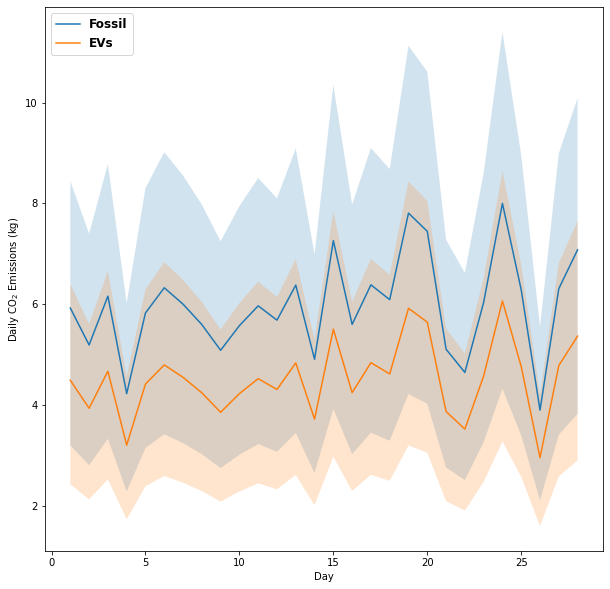

In [126]:
fig, ax = plt.subplots(figsize=(10,10))

x = long_df['day'].unique().tolist()
avg = long_df.groupby(['day']).mean()
maxvals = long_df.groupby(['day']).max()
minvals = long_df.groupby(['day']).min()

ax.plot(x, avg['transport_ff'])
ax.fill_between(x,minvals['transport_ff'],maxvals['transport_ff'],alpha=0.2,label='_nolegend_')

ax.plot(x, avg['transport_ev'])
ax.fill_between(x,minvals['transport_ev'],maxvals['transport_ev'],alpha=0.2,label='_nolegend_')

legend_props = {'weight': 'bold', 'size': 12}
plt.legend(['Fossil','EVs'], loc='upper left', prop=legend_props) 

ax.set_xlabel('Day')
ax.set_ylabel('Daily CO$_{2}$ Emissions (kg)')


Now, let's make a plot of cumulative emissions with the highs and lows shaded like before. We're going to change the default colours too - if you want to choose your own, you can replace the hex values below as you like.

Text(0, 0.5, 'Cumulative CO$_{2}$ Emissions (kg)')

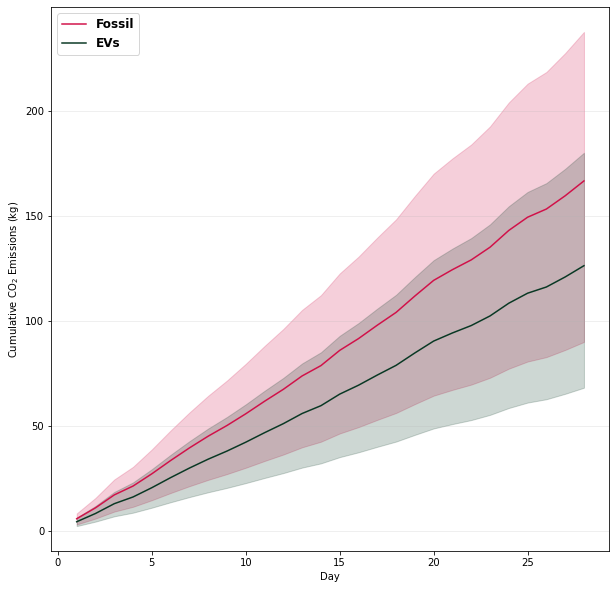

In [132]:
# now, we'll make a cumulative plot using some of the data from above and cumulative values

c_ff = avg['ff_cumulative']
c_ev = avg['ev_cumulative']
c_minff = minvals['ff_cumulative']
c_minev = minvals['ev_cumulative']
c_maxff = maxvals['ff_cumulative']
c_maxev = maxvals['ev_cumulative']

colours = ['#D11149','#093824']

fig, ax = plt.subplots(figsize=(10,10))

ax.plot(x, c_ff,color=colours[0])
ax.fill_between(x,c_minff,c_maxff,alpha=0.2,label='_nolegend_',color=colours[0])

ax.plot(x, c_ev,color=colours[1])
ax.fill_between(x,c_minev,c_maxev,alpha=0.2,label='_nolegend_',color=colours[1])

legend_props = {'weight': 'bold', 'size': 12}
plt.legend(['Fossil','EVs'], loc='upper left', prop=legend_props) 

ax.grid(axis='y',zorder=0,alpha=0.25)
ax.set_xlabel('Day')
ax.set_ylabel('Cumulative CO$_{2}$ Emissions (kg)')



As a challenge for home, you can put some of these calculations into a function (like the very simple "hello world!" example at the beginning of the tutorial). Give this a try if you like! 